# Elements of Data Processing (COMP20008) Project Phase 1


## Phase 1: Warmup - Python Exercises - Model Answer



In [1]:
#Any general code that you want to reuse in the following answers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import datetime as dt
import calendar

In [2]:
taxi_data_original = pd.read_csv('clean-january-sampled.csv', encoding = 'ISO-8859-1')
print(taxi_data_original.dtypes)
taxi_data_original.head(10)


pickup_datetime      object
dropoff_datetime     object
trip_distance       float64
passenger_count       int64
payment_amount      float64
duration              int64
dtype: object


,pickup_datetime,dropoff_datetime,trip_distance,passenger_count,payment_amount,duration
0,14/01/16 17:29,14/01/16 17:40,0.90,1,10.05,11
1,17/01/16 18:25,17/01/16 18:46,3.46,1,20.00,21
2,31/01/16 23:31,31/01/16 23:38,2.02,1,72.92,7
3,16/01/16 22:22,16/01/16 22:29,1.60,1,11.16,7
4,2/01/16 21:31,2/01/16 21:42,1.99,1,10.80,11
5,15/01/16 8:32,15/01/16 8:37,0.70,1,6.30,5
6,19/01/16 16:01,19/01/16 16:10,0.95,2,9.30,9
7,27/01/16 9:30,27/01/16 9:48,5.10,1,22.80,18
8,16/01/16 11:06,16/01/16 11:13,1.90,1,9.30,7
9,22/01/16 16:31,22/01/16 16:49,2.60,1,14.80,18


# 1 Adding a new column to the table (3 marks)
Read the datafile into a pandas dataframe. Using the values in the trip distance column,
determine for each trip whether it should be categorised as a short trip. A short_trip is one
that has a distance of less than 3 miles. Record this information in a new column called
short_trip where this column has value 1 if a trip is short and value 0 otherwise. Create a
new DataFrame with the following schema.


Index Short_Trip Trip_distance Passenger_count Payment_amount Duration

and use it to then print out the percentage of short trips. The output of this step should look like

Question 1

% of short trips=#

\***

where # is the value you calculate rounded to 1 decimal place.

In [3]:
#Answer to 1
taxi_data_original = pd.read_csv('clean-january-sampled.csv', encoding = 'ISO-8859-1')
##### loads a fresh copy from the csv (equals to read_csv) OPTIONAL
taxi_data_q1 = taxi_data_original.copy() 

##### Create the 1-0 short trip column
taxi_data_q1['short_trip'] = (taxi_data_q1['trip_distance']< 3.0).astype(int)

##### Create the new dataframe with subset of the columns
taxi_data_short_trip = taxi_data_q1[['short_trip','trip_distance', 'passenger_count' ,'payment_amount','duration']]
taxi_data_short_trip.index.name = 'Index'

##### Calculate percentage of short trips
perc_short_trips = np.round((taxi_data_q1['short_trip'].sum() / taxi_data_q1.shape[0]) *100,1)
print ('Question 1')
print('% of short trips= ',perc_short_trips)
print('*'*3)

Question 1
% of short trips=  71.1
***


# 2 Basic statistics (2 marks)
What is the median trip_distance and what is the median trip_duration? Your code should
print out the results with the following format:


Question 2 median trip_distance

January: #

\***

Question 2 median trip_duration

January: #

\***

where STAT is the title of the statistic that you are reporting and # is its value rounded to
1 decimal place.

In [4]:
#Answer to 2

# loads a fresh copy from the csv (equals to read_csv)
taxi_data_q2 = taxi_data_original.copy()

print ('Question 2 median trip distance')
print('January: ',np.round(taxi_data_q2['trip_distance'].median(),1))
print('*'*3)

print()
print ('Question 2 median trip duration')
print('January: ',np.round(taxi_data_q2['duration'].median(),1))
print('*'*3)


Question 2 median trip distance
January:  1.8
***

Question 2 median trip duration
January:  11.0
***


# 3 Data cleaning (2 marks)
Consider the feature trip_distance. Suppose the ’normal’ range for this feature's values is
1.2 ≤ trip_distance ≤ 4.5. Compute the percentage of values that do not fall within this
normal range.

The output of this step should be a message printed with the following format:

Question 3

#% of instances in ‘tripdistance’ are abnormal! (normal range is between 1.2 and 4.5)

\***

where # is the computed value rounded to one decimal place.

In [5]:
#Answer to 3

### loads a fresh copy from the csv (equals to read_csv)
taxi_data_q3 = taxi_data_original.copy()

### Finds the abnormal boolean vector using the provided valid range
bool_abnormal = (taxi_data_q3['trip_distance'] < 1.2)  | (taxi_data_q3['trip_distance'] > 4.5)

### Calculate the percentage of abnormal values (rounded to one decimal place)
perc_abnormal = np.round((bool_abnormal.sum()/bool_abnormal.shape[0])*100,1)

print ('Question 3')
print(perc_abnormal,'% of instances in \'tripdistance\' are abnormal! (normal range is between 1.2 and 4.5')
print('*'*3)

Question 3
43.1 % of instances in 'tripdistance' are abnormal! (normal range is between 1.2 and 4.5
***


# 4 Visualisation using boxplots (2 marks)

Draw a plot consisting of two boxplots. One boxplot to show the distribution of trip fares during the morning period (trip started during the period 07:00 ≤ time ≤ 11:00). One boxplot to show the distribution of trip fares during the afternoon period (trip started during the period 12:00 ≤ time ≤ 15:00 ).

tip: pandas.DataFrame.boxplot() draws a boxplot for each column of the DataFrame object

tip: pandas.to datetime() converts a string to a datetime object. The time and date information
are formatted as ’%d/%m/%y %H:%M’.

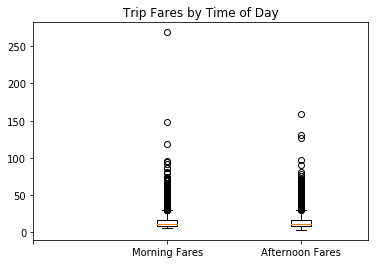

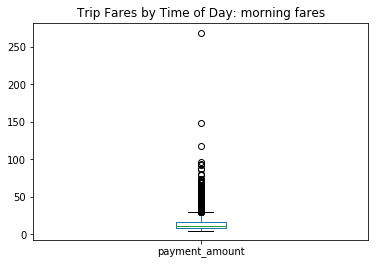

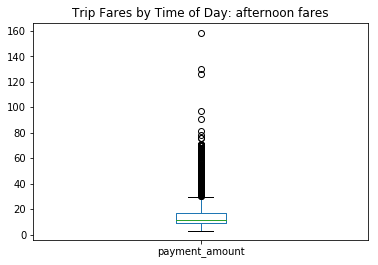

In [6]:
#Answer to 4

import datetime as dt
taxi_data_original['pickup_datetime']= pd.to_datetime(taxi_data_original['pickup_datetime'], format= '%d/%m/%y %H:%M')
taxi_data_original['dropoff_datetime']= pd.to_datetime(taxi_data_original['dropoff_datetime'],format= '%d/%m/%y %H:%M')

#####Morning trips period
morning_st_time = dt.time(hour=7,minute=0) 
morning_end_time = dt.time(hour=11,minute=0)

#####Noon trips period
noon_st_time = dt.time(hour=12,minute=0)
noon_end_time = dt.time(hour=15,minute=0)


#### Extracting morning and afternoon trips
start_morning = taxi_data_original['pickup_datetime'].dt.time >= morning_st_time 
end_morning = taxi_data_original['pickup_datetime'].dt.time <= morning_end_time

start_noon = taxi_data_original['pickup_datetime'].dt.time >= noon_st_time
end_noon = taxi_data_original['pickup_datetime'].dt.time <= noon_end_time


#### Trip fares for morning and afternoon trips
s1= taxi_data_original['payment_amount'][start_morning & end_morning]
s2= taxi_data_original['payment_amount'][start_noon & end_noon]

#### Plotting results
#############Solution 1
plt.boxplot([s1,s2])
plt.xticks(range(3),["","Morning Fares", "Afternoon Fares"])
plt.title('Trip Fares by Time of Day')
plt.show()


#############Solution 2
s1.plot.box() # using whis='range' is also accepted as a correct answer
plt.title('Trip Fares by Time of Day: morning fares')
plt.show()
s2.plot.box()# using whis='range' is also accepted as a correct answer
plt.title('Trip Fares by Time of Day: afternoon fares')
plt.show()

# 5 Summary (2 marks)

Create a new column isPeak that indicates whether a trip was both started (i.e. the meter was
engaged) and completed (i.e. the meter was disengaged) in peak hour (07:00 ≤ time ≤ 08:59
on weekdays). It should have value 1 for peak hour trips and value 0 otherwise. Calculate
and print out the percentage of trips that are peak hour trips. The output of this step should
look like

Question 5

% of peak hour trips=#

\***

where # is the value you calculate rounded to 1 decimal place.


In [7]:
#Answer to 5
#### loads a fresh copy from the csv (equals to read_csv)
taxi_data_q5 = taxi_data_original.copy()



#### Peak time interval
start_peak_time = dt.time(hour=7,minute=0)
end_peak_time = dt.time(hour=8,minute=59)

#### .dayofweek property : The day of the week with Monday=0, Sunday=6
#### bool_weekdays is boolean vector: true for weekdays trips and false for other trips
bool_weekdays =(taxi_data_q5['pickup_datetime'].dt.dayofweek >=0) & (taxi_data_q5['pickup_datetime'].dt.dayofweek <= 4)


#### bool_peak_hours_start is boolean vector: true for trips started within the peak interval
#### bool_peak_hours_end is boolean vector: true for trips ended within the peak interval
bool_peak_hours_start = (taxi_data_q5['pickup_datetime'].dt.time >= start_peak_time) & (taxi_data_q5['pickup_datetime'].dt.time <= end_peak_time)
bool_peak_hours_end = (taxi_data_q5['dropoff_datetime'].dt.time >= start_peak_time) & (taxi_data_q5['dropoff_datetime'].dt.time <= end_peak_time)

#### isPeak --> int dataframe column with values 1 for trips within the peak interval and not weekends; otherwise 0
taxi_data_q5['isPeak'] = (bool_weekdays & bool_peak_hours_start & bool_peak_hours_end).astype(int)


#### Calculating the percentage of peak hour trips.
perc_peak_houre_trips = np.round((taxi_data_q5['isPeak'].sum()/ taxi_data_q5['isPeak'].shape[0])*100,1)
print ('Question 5')
print('% of peak hour trips=',perc_peak_houre_trips)
print('*'*3)


Question 5
% of peak hour trips= 6.2
***


In [8]:
#### Displaying the trips dataframe with the isPeak int column
taxi_data_q5.head(10)

,pickup_datetime,dropoff_datetime,trip_distance,passenger_count,payment_amount,duration,isPeak
0,2016-01-14 17:29:00,2016-01-14 17:40:00,0.90,1,10.05,11,0
1,2016-01-17 18:25:00,2016-01-17 18:46:00,3.46,1,20.00,21,0
2,2016-01-31 23:31:00,2016-01-31 23:38:00,2.02,1,72.92,7,0
3,2016-01-16 22:22:00,2016-01-16 22:29:00,1.60,1,11.16,7,0
4,2016-01-02 21:31:00,2016-01-02 21:42:00,1.99,1,10.80,11,0
5,2016-01-15 08:32:00,2016-01-15 08:37:00,0.70,1,6.30,5,1
6,2016-01-19 16:01:00,2016-01-19 16:10:00,0.95,2,9.30,9,0
7,2016-01-27 09:30:00,2016-01-27 09:48:00,5.10,1,22.80,18,0
8,2016-01-16 11:06:00,2016-01-16 11:13:00,1.90,1,9.30,7,0
9,2016-01-22 16:31:00,2016-01-22 16:49:00,2.60,1,14.80,18,0


# 6 Grouping (3 marks)
Create a new column called dayofmonth which has values in the range 1-31 and records on
which day of the month each trip began (i.e. the meter was engaged). Now draw a bar plot
showing dayofmonth (x-axis) versus total number of trips beginning on that day (y-axis).


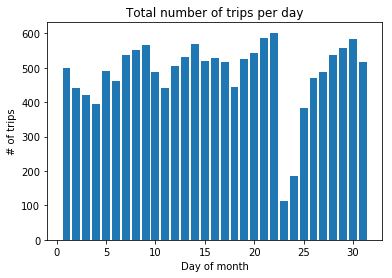

In [9]:
#Answer to 6

#### loads a fresh copy from the csv (equals to read_csv)
taxi_data_q6 = taxi_data_original.copy()

#### .day property : The day of the month between 1 and 31
taxi_data_q6['dayofmonth'] = taxi_data_q6['pickup_datetime'].dt.day

#### use pd['col'].value_counts() to compute the number of trips for each day (i.e. 1-31)
res = taxi_data_q6['dayofmonth'].value_counts(sort=False)

plt.bar(res.index , res.values)
plt.xlabel('Day of month')
plt.ylabel('# of trips')
plt.title('Total number of trips per day')
plt.show()

# 7 Scatter plot (4 marks)
Create a column dayofweek which records the day of the week (Sunday to Saturday) on which
the trip began. Then, compute the mean trip distance and mean payment amount for each day
of the week (calculated over all trips which began on that day). Draw a scatter plot showing
mean trip distance (y axis) versus mean payment amount for the 7 days of the week. Each
day of the week should be plotted in a different colour and there should be an accompanying
legend mapping colours to days of the week.


###############Solution 1#############



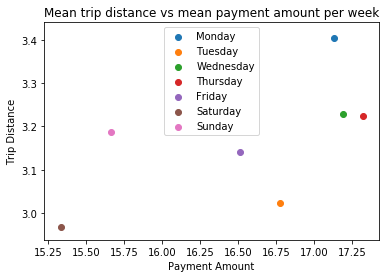

###############Solution 2#############



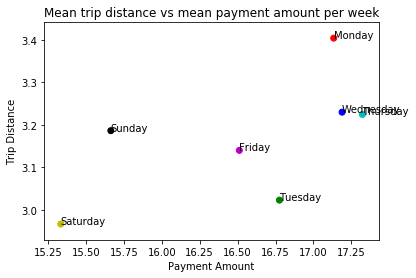

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [11]:
#Answer to 7

#### loads a fresh copy from the csv (equals to read_csv)
taxi_data_q7 = taxi_data_original.copy()
taxi_data_q7['dayofweek']  = taxi_data_q7['pickup_datetime'].dt.dayofweek


#### List of names of week days (i.e. Monday, Tuesday, ... Sunday )
days_names  = list(calendar.day_name)

##### Use groupby and agg functions to compute the mean trip distance and mean payment amount for each day of the week
res_q7 = taxi_data_q7[['dayofweek','trip_distance','payment_amount']].groupby('dayofweek').agg({'trip_distance':'mean','payment_amount':'mean'})
res_q7=res_q7.set_index(pd.Series(days_names))


############## Plotting ##################
print('###############Solution 1#############')    
print()
for i in range(len(days_names)):
    plt.scatter(res_q7['payment_amount'][i],res_q7['trip_distance'][i],label = days_names[i])
plt.xlabel('Payment Amount')
plt.ylabel('Trip Distance')
plt.legend()
plt.title('Mean trip distance vs mean payment amount per week')
plt.show()


print('###############Solution 2#############')    
print()
fig, ax = plt.subplots()
ax.scatter(res_q7['payment_amount'],res_q7['trip_distance'],c=['r','g','b','c','m','y','k'])
plt.xlabel('Payment Amount')
plt.ylabel('Trip Distance')
for i in range(len(days_names)):
    ax.annotate(days_names[i], (res_q7['payment_amount'][i],res_q7['trip_distance'][i]))    
plt.title('Mean trip distance vs mean payment amount per week')
plt.show()

print(days_names)

#  8 Parallel co-ordinates (4 marks)

For each of the features trip distance, passenger count and payment amount, normalise its
values to lie within the range [0, 1] (0 to 1 inclusive). Use the the following formula for
normalising a feature:

Using these normalised features, compute the mean trip distance, mean passenger count
and mean payment amount for each day of the week. Then, draw a parallel co-ordinates plot,
having 7 lines, each corresponding to a different day of the week. The ordering of the features
for the plot should be mean trip distance first (leftmost), followed by mean passenger count,
followed by mean payment amount. Colour the weekdays in red and the weekends in blue.
Provide a legend mapping colours to day type.

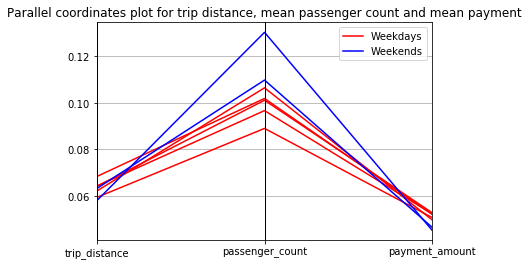

In [11]:
#Answer to 8

#### Copy a subset from trips dataframe used in Q7 to solve Q8 
taxi_data_q8 = taxi_data_q7[['passenger_count','payment_amount','trip_distance','dayofweek']].copy()


#### Attribute normalization (i.e. range 0-1)
for col in taxi_data_q8.columns[:-1]:
    min_val = taxi_data_q8[col].min()
    max_val = taxi_data_q8[col].max()
    
    taxi_data_q8[col]= (taxi_data_q8[col] - min_val )/(max_val-min_val)

#### List of names of week days (i.e. Monday, Tuesday, ... Sunday )
days_names  = list(calendar.day_name)

##### Use groupby and agg functions to compute the mean trip distance, mean passenger count and mean payment amount for each day of the week
res_q8 = taxi_data_q8.groupby('dayofweek').agg({'trip_distance':'mean','passenger_count':'mean','payment_amount':'mean'})
res_q8['dayofweek'] = pd.Series(days_names)
res_q8.loc[0:4,'daytype'] = 'Weekdays'
res_q8.loc[5:,'daytype'] = 'Weekends'


################ Plotting
parallel_coordinates(res_q8[['trip_distance','passenger_count','payment_amount','daytype']],'daytype',color=["r","b"])
plt.title('Parallel coordinates plot for trip distance, mean passenger count and mean payment')
plt.show()

# 9 Pie Chart (4 marks)
Create a new column called minutes_travelling, which for each trip is equal to the passenger_count multiplied by the trip_duration. Create a pie chart showing the mean minutes_travelling for each day of the week. Each of the 7 slices of the pie should have a different colour and contain a percentage number listing its relative size. Each slice of the pie should have a label next to it indicating which day of the week it corresponds to.

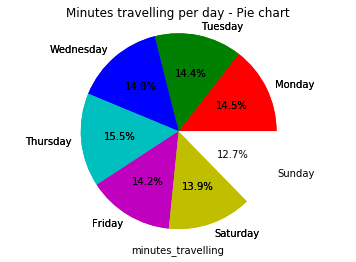

In [15]:
#Answer to 9

#### Again, copy a subset from trips dataframe used in Q7 to solve Q9 
taxi_data_q9 =taxi_data_q7[['dayofweek']].copy()

#### Add a column with the minutes travelling
taxi_data_q9['minutes_travelling'] = taxi_data_original.loc[:,'passenger_count']*taxi_data_original.loc[:,'duration']
days_names  = list(calendar.day_name)

##### Use groupby and agg functions to compute the mean minutes travelling for each day of the week
res_q9 = taxi_data_q9[['dayofweek','minutes_travelling']].groupby('dayofweek').agg({'minutes_travelling':'mean'})
res_q9=res_q9.set_index(pd.Series(days_names))

##################### Plotting
res_q9.minutes_travelling.plot.pie(autopct='%1.1f%%',colors=['r','g','b','c','m','y','w'])
plt.xlabel('minutes_travelling')
plt.axis('equal')
plt.ylabel("")
plt.title('Minutes travelling per day - Pie chart')
plt.show()


# 10 Another Scatter Plot - harder (5 marks)

For each day of the month (1-31), compute the maximum number of trips occurring within
any 60 minute period on that day. This 60min period must start and end on that day, but does
not need to begin exactly on the boundary of an hour. It can be defined by the time window
Start time ≤ time < Start time + 60. Call this max_trips_60min_day. Create a scatter plot of
31 points, whose x-axis is day of the month (1-31) and y-axis is max_trips_60min_day. Colour
weekdays red and weekends blue. Include a legend that explains the colour mapping.

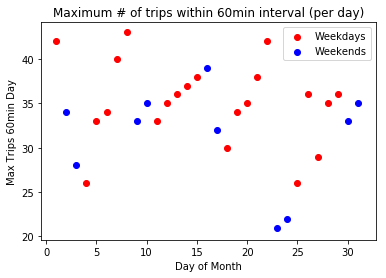

In [13]:
#Answer to 10
#### No assumption for sorted column (pickup_datetime)

#### loads a fresh copy from the csv (equals to read_csv)
taxi_data_q10 = taxi_data_original.copy()


taxi_data_q10['pickup_day'] = taxi_data_q10['pickup_datetime'].dt.day
taxi_data_q10['dropoff_day'] = taxi_data_q10['dropoff_datetime'].dt.day
taxi_data_q10['start_time'] = taxi_data_q10['pickup_datetime'].dt.time
taxi_data_q10['end_time'] = taxi_data_q10['dropoff_datetime'].dt.time


##### Step 1: group trips by pickup day
groupbyday = taxi_data_q10.groupby('pickup_day')
index = 0
t_delta = dt.timedelta(minutes=60)

##### max_trips_60min_day at cell i conntains the max number of trip happened within an hour in day i
max_trips_60min_day = np.zeros(32,np.int)
weekdays = []
weekends = []
for i,df_per_day in groupbyday:
   
    # find subset from the dataframe with all trips happened on that day # with duration less than or equal to 60min
    df_per_day_filtered = df_per_day[(df_per_day['duration'] <= 60) & (df_per_day['dropoff_day'] == i)] # filter out any trip with duration more than 60min or happened through 2 days
    
    for k in range (df_per_day_filtered.shape[0]):
        t = df_per_day_filtered.iloc[k,8] # 'start_time' index 8
        t_end = df_per_day_filtered.iloc[k,0] + t_delta # 'pickup_datetime' index 0
        
        # find all trips within the interval of t : t+60 
        ################### Trips should end within the interval 
        ################### Check xx<=time<xxx
        trips_flag = (df_per_day_filtered['start_time'] >= t) & (df_per_day_filtered['end_time'] < (t_end.time()))
        trips_num = np.sum(trips_flag)
        if (trips_num > max_trips_60min_day[i]):
            #print(trips_num)
            max_trips_60min_day[i] = trips_num
    
    
    
    ############### getting day type for plotting (colour)
    day_index = (df_per_day['pickup_datetime'].dt.dayofweek).values[0]   
    if (day_index >=0) & (day_index<=4):
        weekdays.append(i)
    else: 
        weekends.append(i)
    
plt.scatter(weekdays,max_trips_60min_day[weekdays], c='r', label = "Weekdays")
plt.scatter(weekends,max_trips_60min_day[weekends], c='b', label = "Weekends")    
plt.xlabel('Day of Month')
plt.ylabel('Max Trips 60min Day')
plt.legend()
plt.title('Maximum # of trips within 60min interval (per day)')
plt.show()